In [1]:
import mnist_loader
import pickle
import numpy as np 
import autoencoder
import matplotlib.pyplot as plt
import scipy.ndimage
import misc

Using TensorFlow backend.


In [2]:
# load training data
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
# only get x inputs
training_data, test_data = np.array(list(training_data))[:,0], np.array(list(test_data))[:,0]
training_data, test_data = np.array(list(map(lambda x: np.squeeze(x), training_data))), np.array(list(map(lambda x: np.squeeze(x), test_data)))
print("processed data")

processed data


In [3]:
# [ 784, 400, L50, 400, 784] Initialize the Autoencoder
autoencoder = autoencoder.Autoencoder([784, 128, 64], 32, [64, 128, 784])
print("finished building autoencoder")

finished building autoencoder


In [ ]:
# (1) #
# TRAIN THE AUTOENCODER NORMALLY
autoencoder.train(training_data, test_data, epochs = 1)
print("finished training!")

In [ ]:
# TEST ON CUSTOM IMAGE

# load and show custom image
user_array = scipy.ndimage.imread('sample.png', flatten=True, mode=None)
user_array = (-user_array/255) + 1
shape = np.shape(user_array)
imgplot = plt.imshow(user_array, cmap = 'Greys')
plt.show()
# compute and show reconstruction
input_vector = misc.array_2_vec(user_array)
output_vector = autoencoder.predict(np.array([input_vector, input_vector]))[0]
output_array = misc.vec_2_array(output_vector, (28,28) )
imgplot = plt.imshow(output_array, cmap = 'Greys')
plt.show()

In [4]:
# (2) #
# INCREMENTALY TEST ON MNIST DATA
import mnist_loader
# load training data
num_digits = 10
val_data = np.array(list(map(lambda x: np.squeeze(x), np.array(list(validation_data))[:,0])))
np.random.shuffle(val_data)
val_data = val_data[0:num_digits]

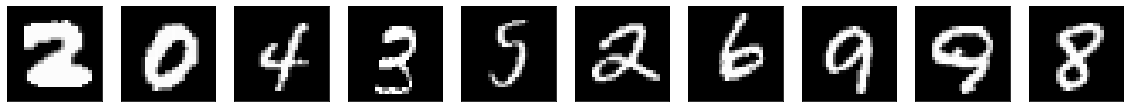

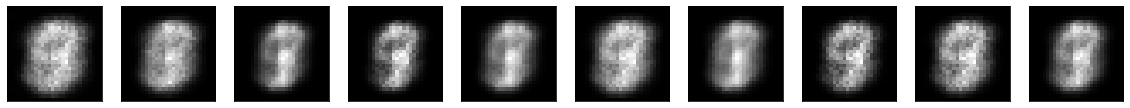

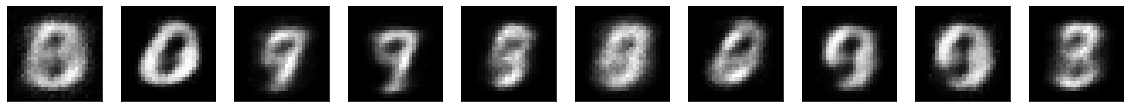

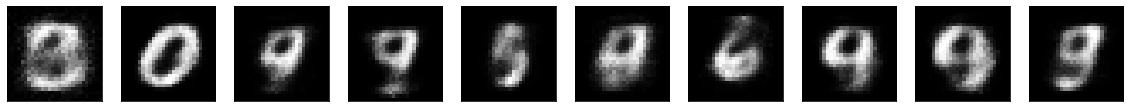

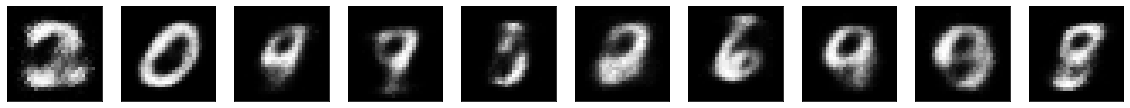

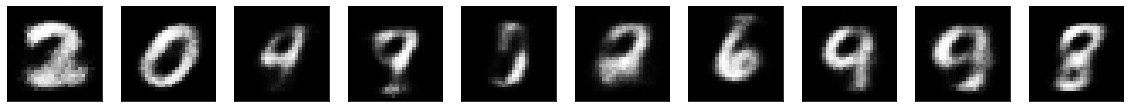

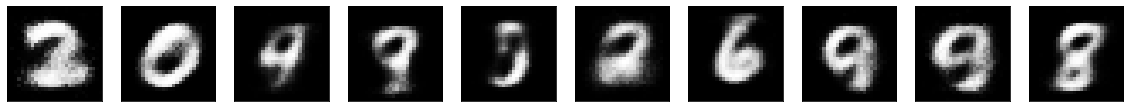

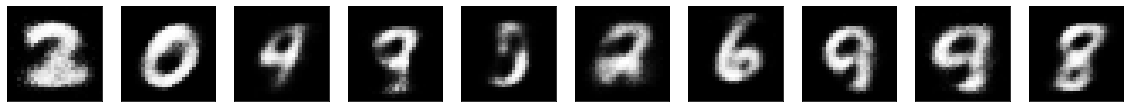

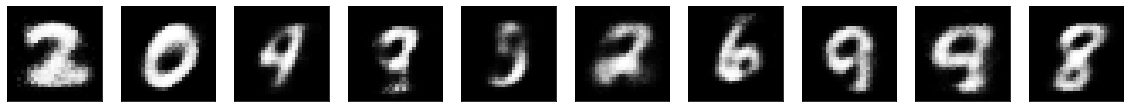

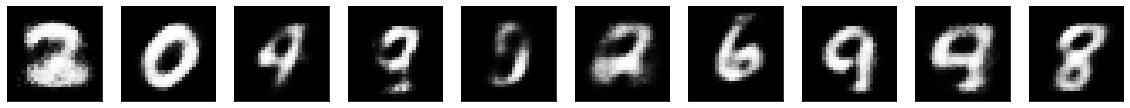

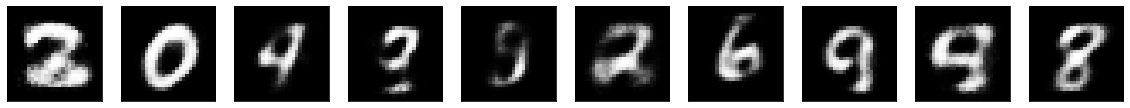

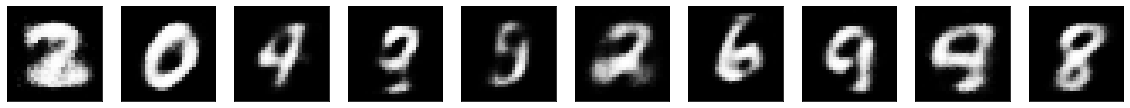

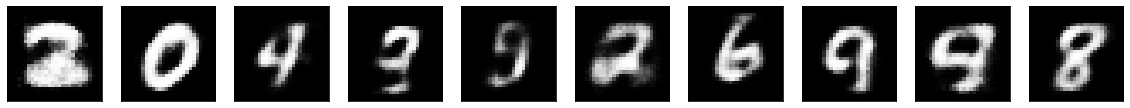

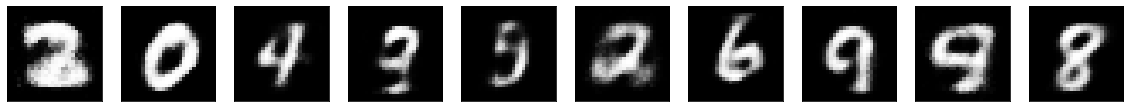

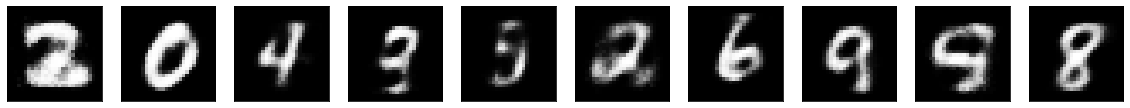

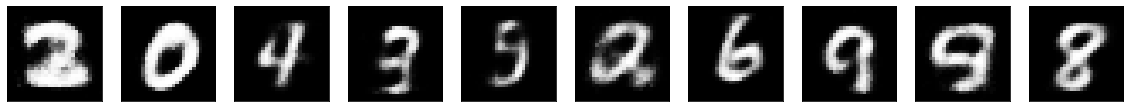

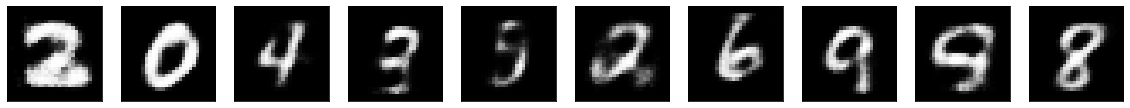

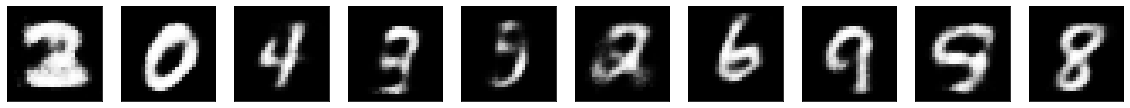

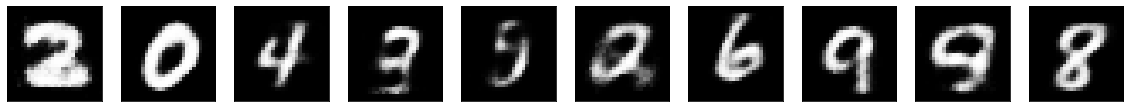

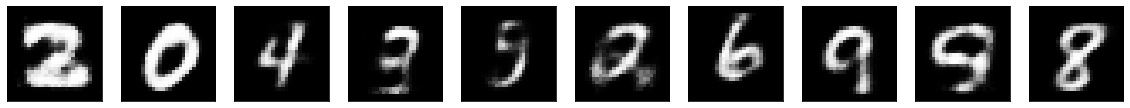

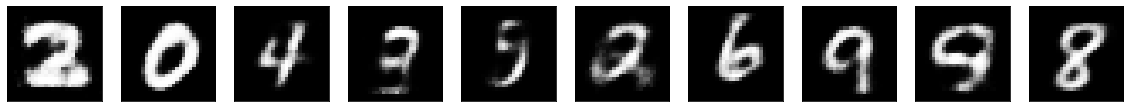

finished training!


In [5]:
# TRAIN AUTOENCODER AND PRINT RESULT
epochs = 20

plt.figure(figsize=(2*num_digits, 4))
for i in range(num_digits):
    # display original
    ax = plt.subplot(2, num_digits, i + 1)
    plt.imshow(val_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

for epoch in range(epochs):
    autoencoder.train(training_data, test_data, epochs = 1, verbose = 0)
    predicted_imgs = autoencoder.predict(val_data)
    # copypasta code to display digits
    plt.figure(figsize=(2*num_digits, 4))
    for i in range(num_digits):
        # display reconstruction
        ax = plt.subplot(2, num_digits, i + 1 + num_digits)
        plt.imshow(predicted_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

print("finished training!")

In [ ]:
# SAVE MODEL

import os
from keras.models import model_from_json
save_path = os.getcwd() + '/model_weights/model_v3.h5'

autoencoder.autoencoder.save_weights(save_path)
with open(os.getcwd() + '/model_weights/model_architecture3.json', 'w') as f:
    f.write(autoencoder.autoencoder.to_json())